---
title: "Inductive Bias in Decision Trees and K-Nearest Neighbors"
author: "Vivek Sivaramakrishnan"
format:
  html:
    theme: theme.scss
    toc: true
    html-math-method: katex
---

Slides: [Click here!](./demo.html){target="_blank"}

# Construct a checkerboard Dataset

Text(0.5, 1.0, 'Chessboard (Rotated)')

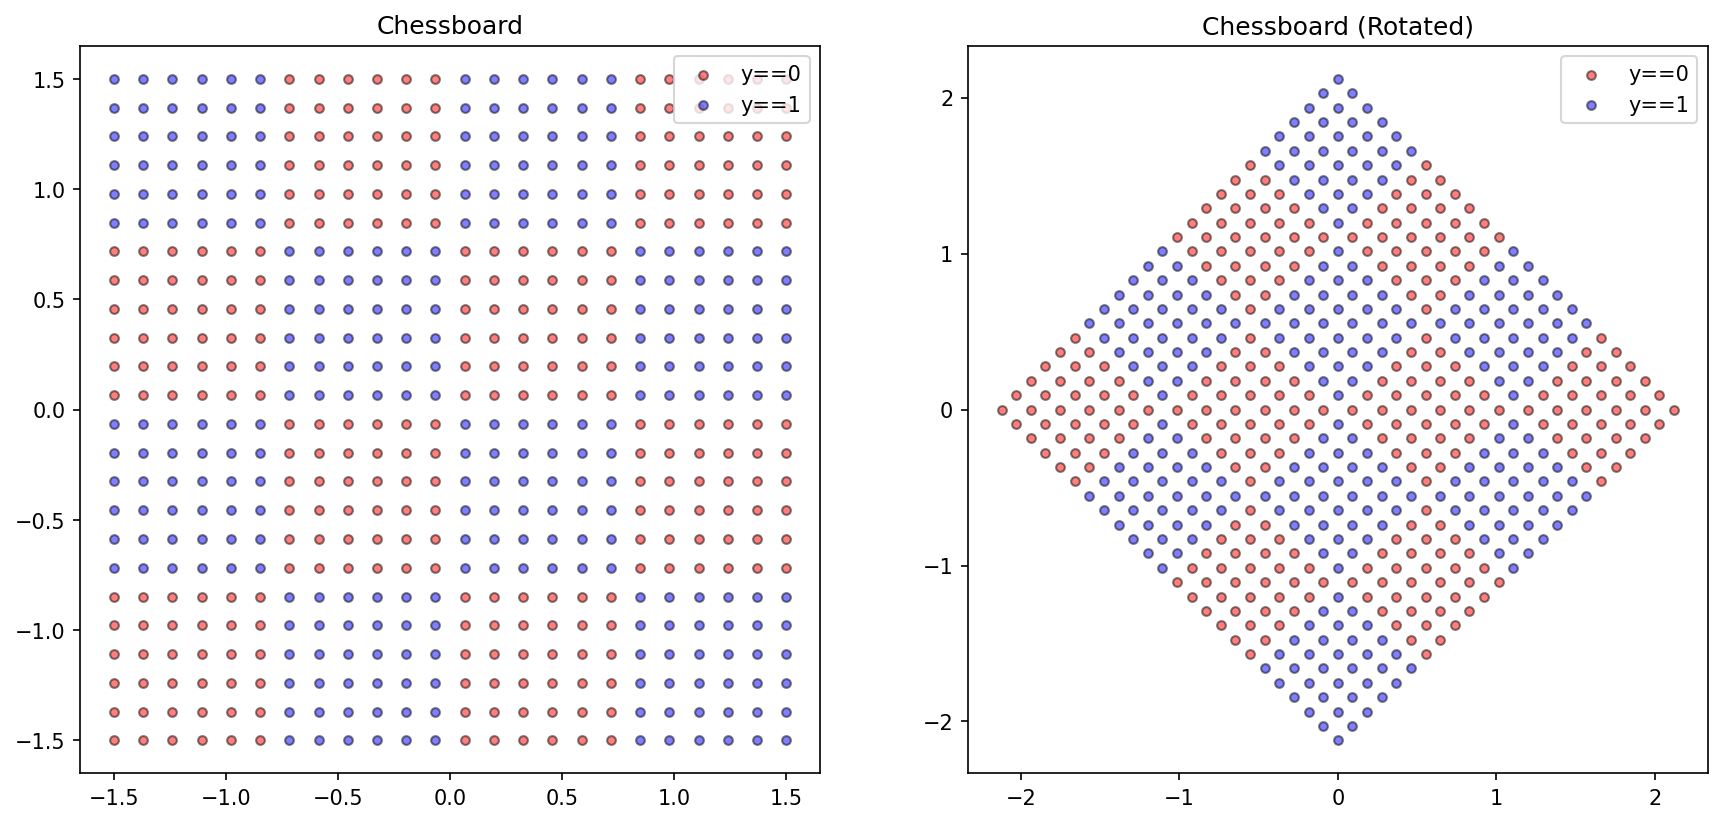

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (14, 6.3)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.markersize'] = 4.2

X, y = [], []
r, c = -1, -1
d = 4
n = 6
for i in np.linspace(0, 3, num=d*n):
  r += 1
  for j in np.linspace(0, 3, num=d*n):
    c += 1
    X.append([i, j])
    y.append(int(bool((r//n)%2) and not bool((c//n)%2) or not bool((r//n)%2) and bool((c//n)%2)))

X = np.array(X)
X -= np.mean(X, axis=0)
y = np.array(y)

r = np.pi/4
rotate = np.array([[np.cos(r), np.sin(r)], [np.sin(r), -np.cos(r)]])
X_rotated = X@rotate

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(X[:, 0][y==0], X[:, 1][y==0], color='red', label='y==0', alpha=0.5, edgecolor='k')
ax1.scatter(X[:, 0][y==1], X[:, 1][y==1], color='blue', label='y==1', alpha=0.5, edgecolor='k')
ax1.legend()
ax1.set_title('Chessboard')

ax2.scatter(X_rotated[:, 0][y==0], X_rotated[:, 1][y==0], color='red', label='y==0', alpha=0.5, edgecolor='k')
ax2.scatter(X_rotated[:, 0][y==1], X_rotated[:, 1][y==1], color='blue', label='y==1', alpha=0.5, edgecolor='k')
ax2.legend()
ax2.set_title('Chessboard (Rotated)')

## Decision Trees

Popular representation for **interpretable** classifiers; even among humans!

Example: I've just arrived at a restaurant. Should I stay (wait for a table) or go elsewhere?

One may choose to use the following set of *rules* to make their decision:
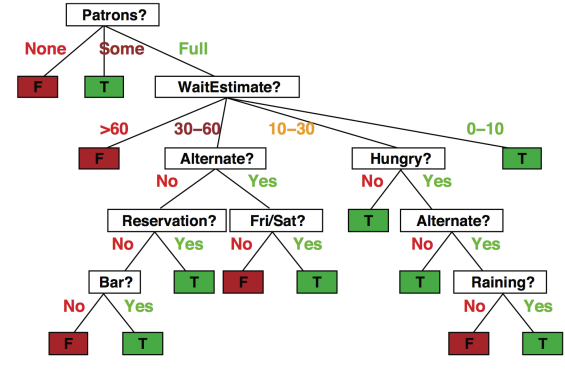

source: ai.berkeley.edu

Decision trees:
- Have a simple Design
- Interpretable
- Easy to implement
- Good performance in practice

Note that splits happen *individually* at the feature level - corresponds to splits parallel to a feature axis - **Inductive bias**

Inductive bias: anything which makes the algorithm learn one pattern instead of another pattern.

Decision trees use a step-function collection for classification; but these step functions utilize one feature/variable only. Is this phenomenon sensitive to the nature of the dataset?

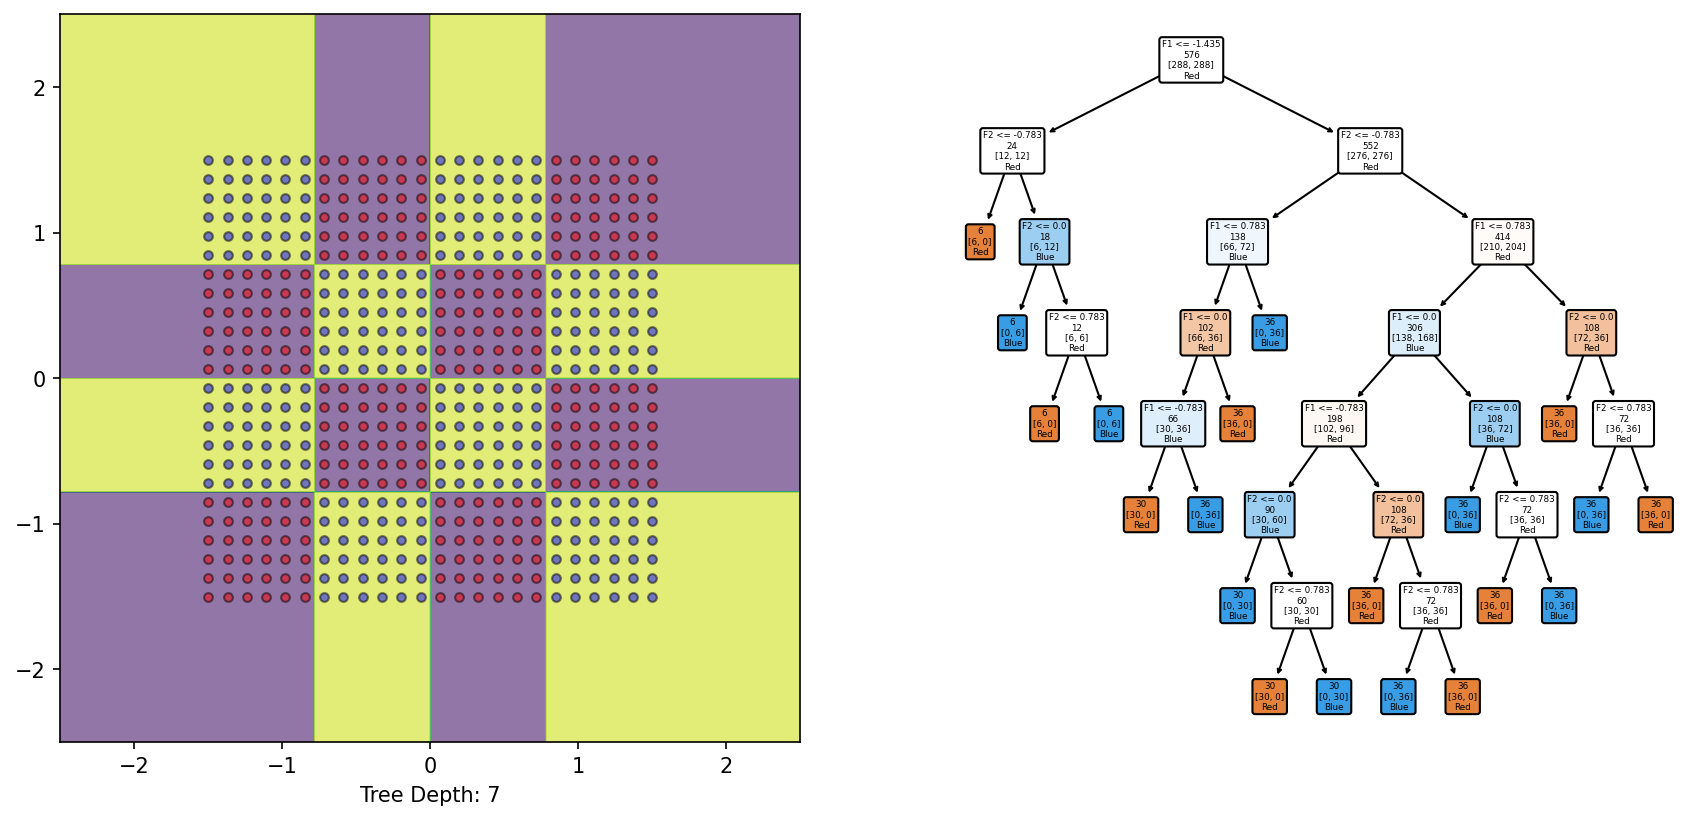

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

DTree = DecisionTreeClassifier()
DTree.fit(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2)

disp = DecisionBoundaryDisplay.from_estimator(DTree, X, response_method="predict", grid_resolution=1000, alpha=0.6, ax = ax1)
disp.ax_.scatter(X[:, 0][y==0], X[:, 1][y==0], color='red', label='y==0', edgecolor='k', alpha=0.5)
disp.ax_.scatter(X[:, 0][y==1], X[:, 1][y==1], color='blue', label='y==1', edgecolor='k', alpha=0.5)
disp.ax_.set_xlabel(f'Tree Depth: {DTree.get_depth()}');

plot_tree(DTree, label='none', filled=True, feature_names=['F1', 'F2'], class_names=['Red', 'Blue'], node_ids=False, rounded=True, impurity=False, ax=ax2);

The 4x4 checkerboard dataset with alternating classes requires a tree of `depth=7` to capture its structure respectively.

But what will happen if we try to train a tree on the rotated variant of this dataset?

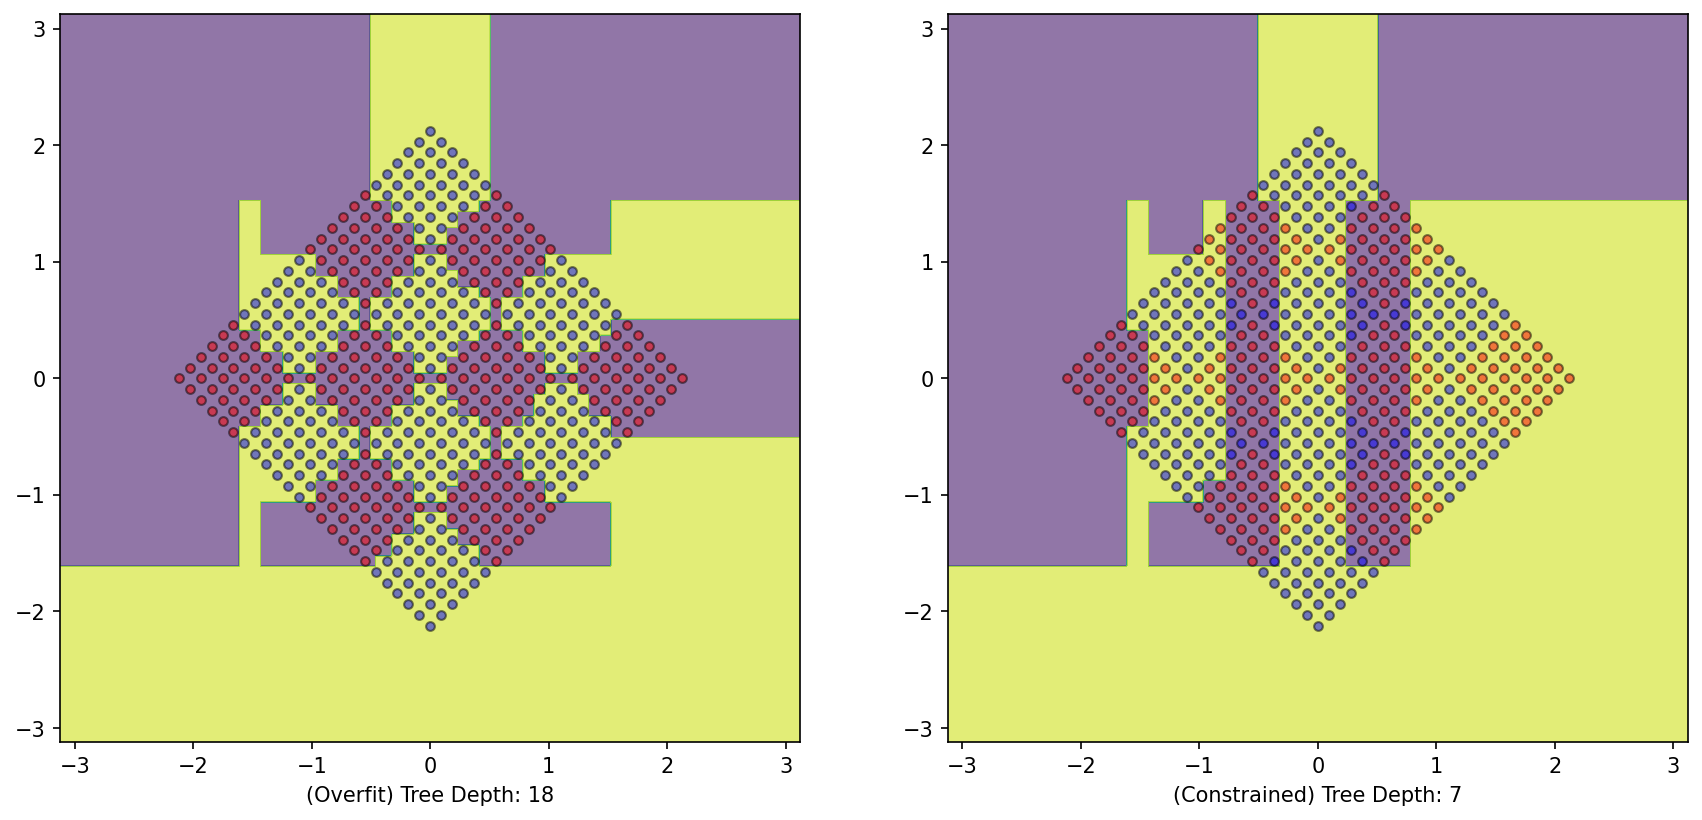

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

DTree_rotated = DecisionTreeClassifier()
DTree_rotated.fit(X_rotated, y)

disp = DecisionBoundaryDisplay.from_estimator(DTree_rotated, X_rotated, response_method="predict", grid_resolution=1000, alpha=0.6, ax=ax1)
disp.ax_.scatter(X_rotated[:, 0][y==0], X_rotated[:, 1][y==0], color='red', label='y==0', edgecolor='k', alpha=0.5)
disp.ax_.scatter(X_rotated[:, 0][y==1], X_rotated[:, 1][y==1], color='blue', label='y==1', edgecolor='k', alpha=0.5)
disp.ax_.set_xlabel(f'(Overfit) Tree Depth: {DTree_rotated.get_depth()}')

DTree_rotated_constrained = DecisionTreeClassifier(max_depth=7)
DTree_rotated_constrained.fit(X_rotated, y)

disp = DecisionBoundaryDisplay.from_estimator(DTree_rotated_constrained, X_rotated, response_method="predict", grid_resolution=1000, alpha=0.6, ax=ax2)
disp.ax_.scatter(X_rotated[:, 0][y==0], X_rotated[:, 1][y==0], color='red', label='y==0', edgecolor='k', alpha=0.5)
disp.ax_.scatter(X_rotated[:, 0][y==1], X_rotated[:, 1][y==1], color='blue', label='y==1', edgecolor='k', alpha=0.5)
disp.ax_.set_xlabel(f'(Constrained) Tree Depth: {DTree_rotated_constrained.get_depth()}');

The model fails to understand the generation rationale of the dataset as it suffers an inductive bias of axis-parallel splitting.

### KNN

Examine the performance of KNN (with neighbors=3) on both variants of the dataset

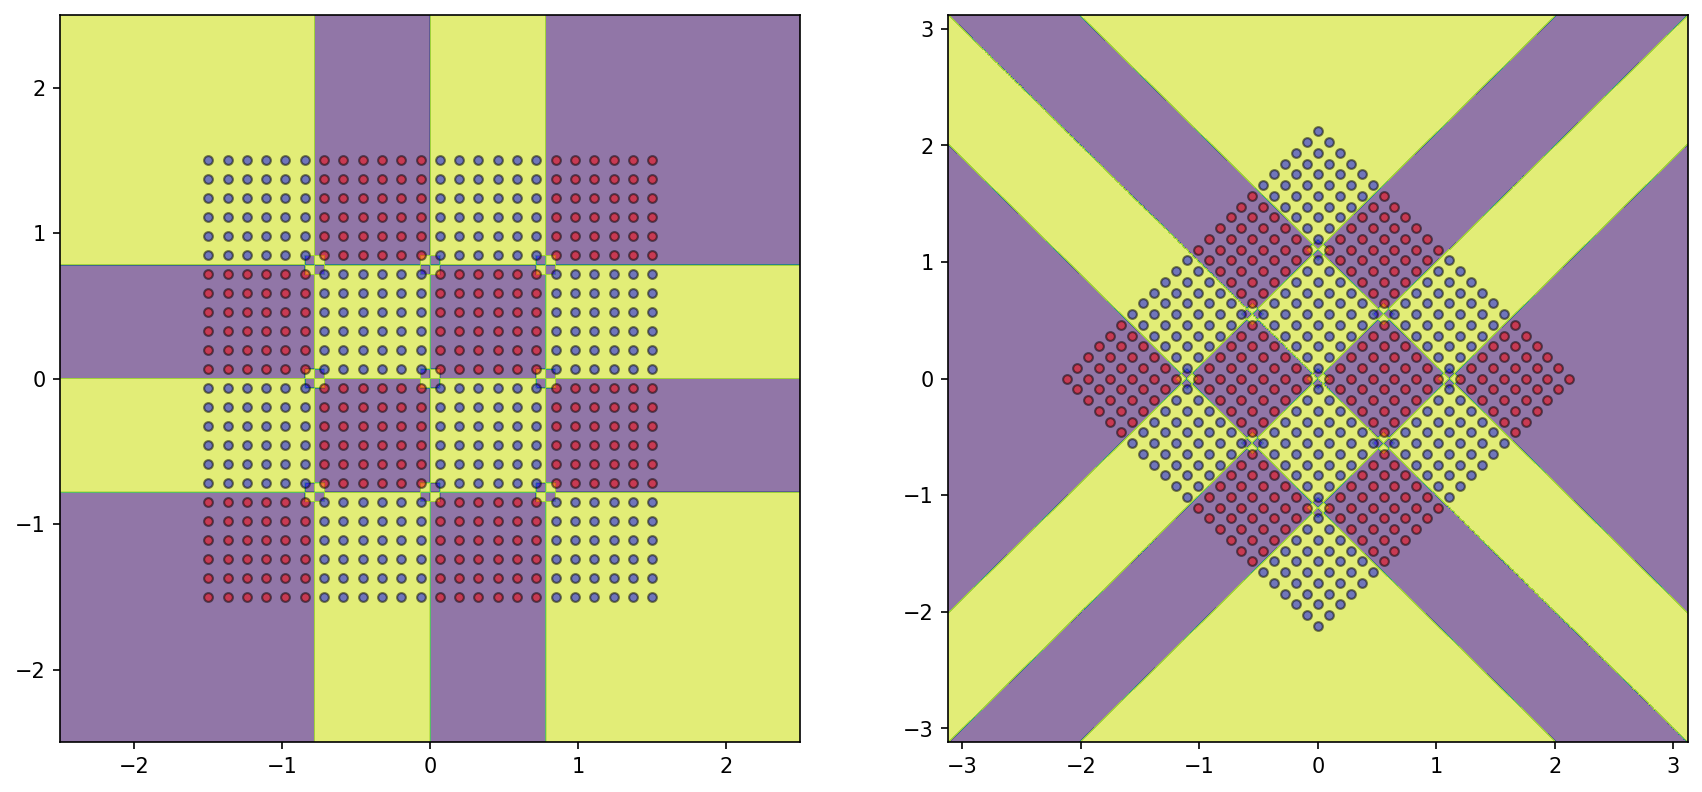

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

fig, (ax1, ax2) = plt.subplots(1, 2)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

disp = DecisionBoundaryDisplay.from_estimator(knn, X, response_method="predict", grid_resolution=1000, alpha=0.6, ax=ax1)
disp.ax_.scatter(X[:, 0][y==0], X[:, 1][y==0], color='red', label='y==0', edgecolor='k', alpha=0.5)
disp.ax_.scatter(X[:, 0][y==1], X[:, 1][y==1], color='blue', label='y==1', edgecolor='k', alpha=0.5)

knn_rotated = KNeighborsClassifier(n_neighbors=3)
knn_rotated.fit(X_rotated, y)

disp = DecisionBoundaryDisplay.from_estimator(knn_rotated, X_rotated, response_method="predict", grid_resolution=1000, alpha=0.6, ax=ax2)
disp.ax_.scatter(X_rotated[:, 0][y==0], X_rotated[:, 1][y==0], color='red', label='y==0', edgecolor='k', alpha=0.5)
disp.ax_.scatter(X_rotated[:, 0][y==1], X_rotated[:, 1][y==1], color='blue', label='y==1', edgecolor='k', alpha=0.5)

The rotation performed does not impact the performance of KNN.

What is the inductive bias in KNN then? To investigate, we construct the following dataset

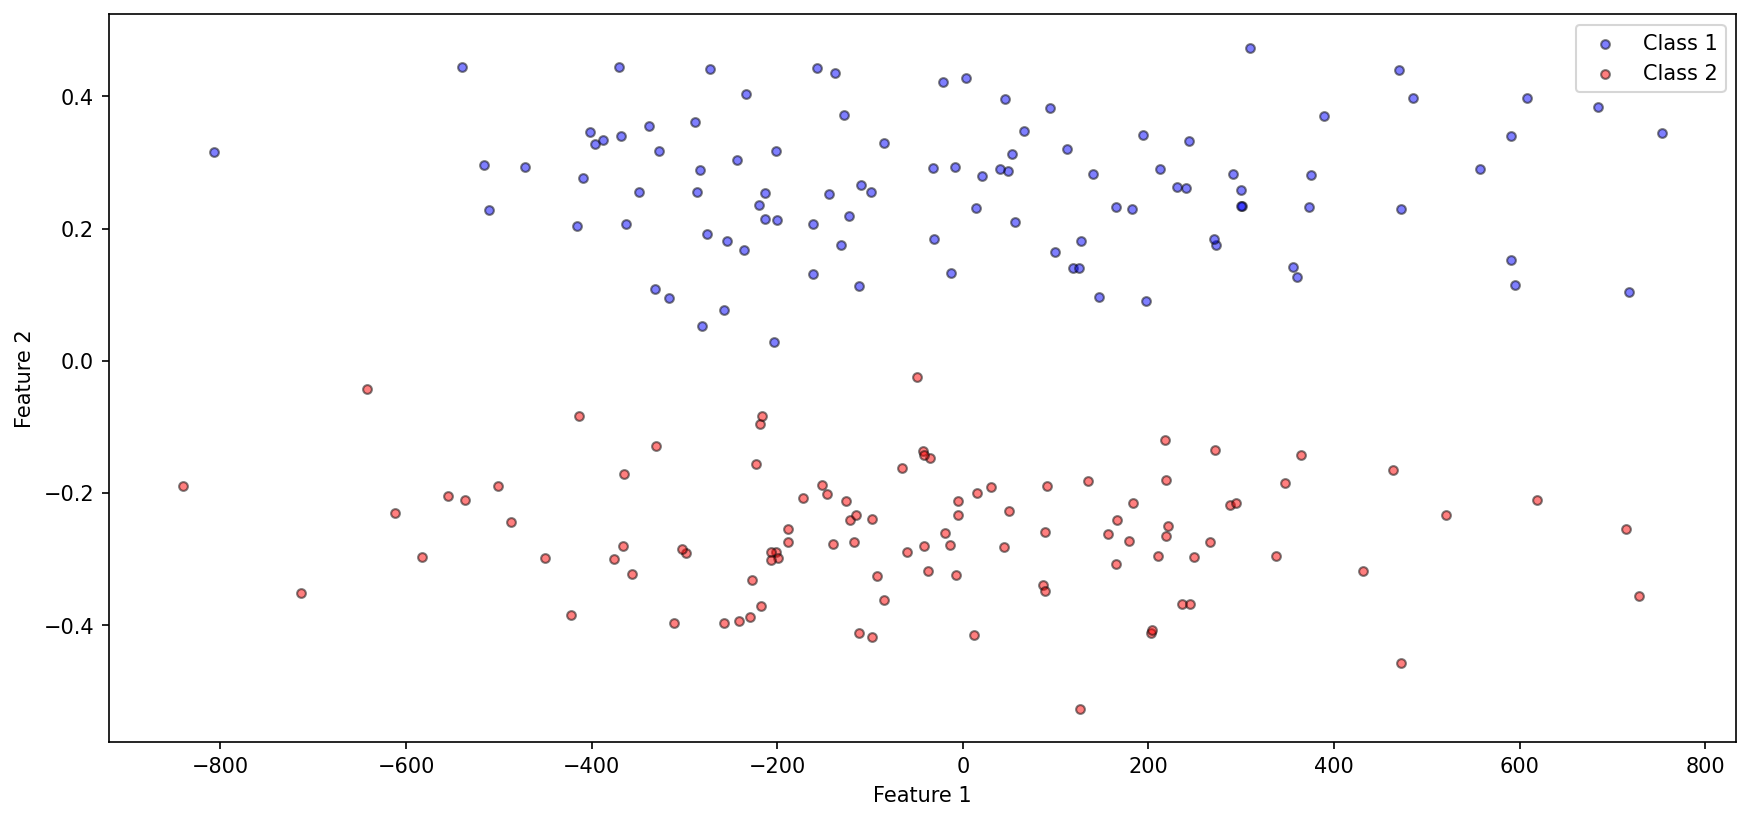

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (14, 6.3)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.markersize'] = 4.2

np.random.seed(0)
class1_mean = [0, 0.25]
class1_cov = [[100000, 0], [0, 0.01]]
class1_data = np.random.multivariate_normal(class1_mean, class1_cov, 100)

class2_mean = [0, -0.25]
class2_cov = [[100000, 0], [0, 0.01]]
class2_data = np.random.multivariate_normal(class2_mean, class2_cov, 100)

plt.scatter(class1_data[:, 0], class1_data[:, 1], c='b', label='Class 1', edgecolor='k', alpha=0.5)
plt.scatter(class2_data[:, 0], class2_data[:, 1], c='r', label='Class 2', edgecolor='k', alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = np.concatenate([class1_data, class2_data])
y = np.array([0 for _ in range(100)] + [1 for _ in range(100)])

X_scaled = StandardScaler().fit_transform(X)
y_scaled = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3).fit(X, y)
knn2 = KNeighborsClassifier(n_neighbors=3).fit(X_scaled, y)

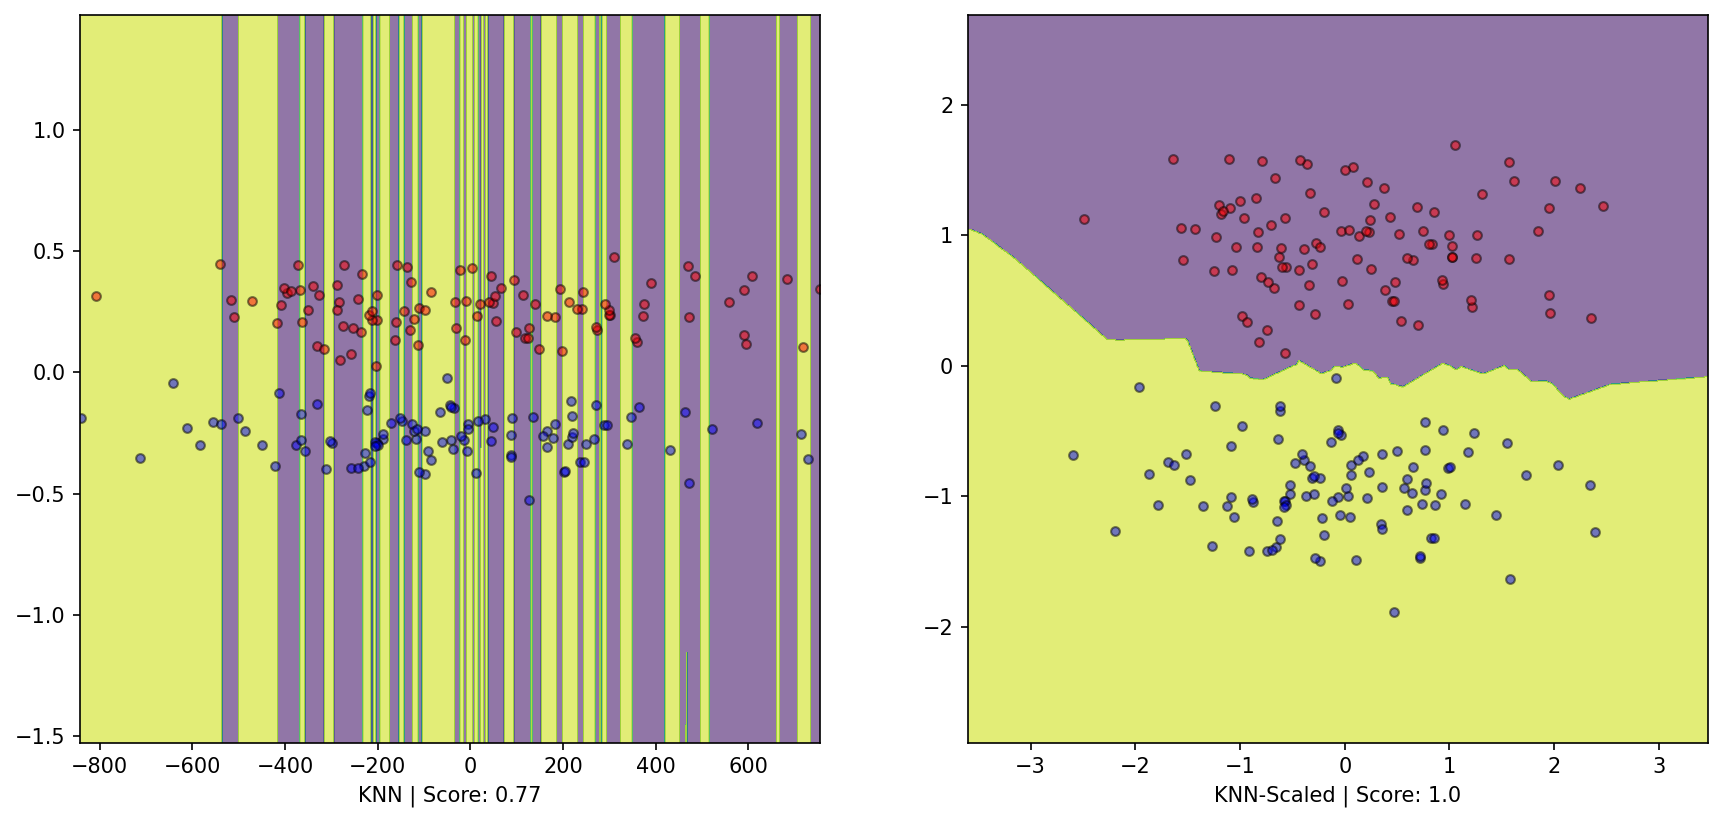

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)

disp = DecisionBoundaryDisplay.from_estimator(knn, X, response_method="predict", grid_resolution=1000, alpha=0.6, ax=ax1)
disp.ax_.scatter(X[:, 0][y==0], X[:, 1][y==0], color='red', label='y==0', edgecolor='k', alpha=0.5)
disp.ax_.scatter(X[:, 0][y==1], X[:, 1][y==1], color='blue', label='y==1', edgecolor='k', alpha=0.5)
disp.ax_.set_xlabel(f'KNN | Score: {knn.score(X, y)}')

disp = DecisionBoundaryDisplay.from_estimator(knn2, X_scaled, response_method="predict", grid_resolution=1000, alpha=0.6, ax=ax2)
disp.ax_.scatter(X_scaled[:, 0][y_scaled==0], X_scaled[:, 1][y_scaled==0], color='red', label='y_scaled==0', edgecolor='k', alpha=0.5)
disp.ax_.scatter(X_scaled[:, 0][y_scaled==1], X_scaled[:, 1][y_scaled==1], color='blue', label='y_scaled==1', edgecolor='k', alpha=0.5)
disp.ax_.set_xlabel(f'KNN-Scaled | Score: {knn2.score(X_scaled, y_scaled)}');

We observe that scaling impacts the performance on the dataset. This reveals the inductive bias for KNN:

The algorithm assumes that entities belonging to a particular category should appear near each other, and those that are part of different groups should be distant.

Here even though the seperation is evident, the scaling makes this phenomenon invisible to the knn classifier; hence the model does not capture this structure in the dataset.

If through context we are confident that our dataset has an underlying linear seperation, we could use the **Perceptron** algorithm

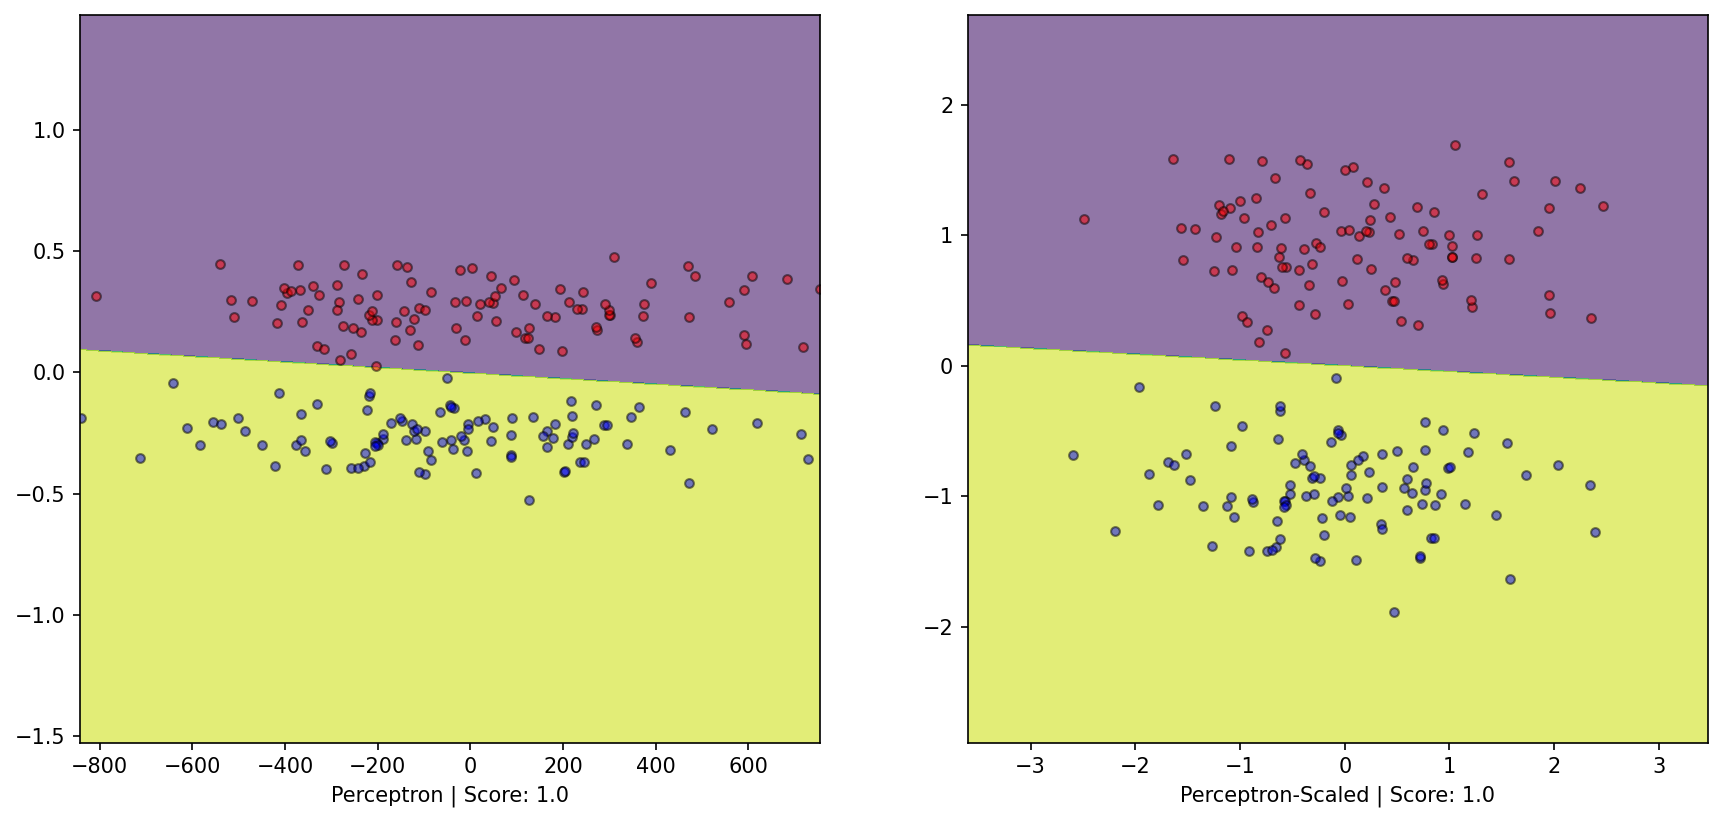

In [ ]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(alpha=0, max_iter=int(1e6), tol=None).fit(X, y)
perceptron_scaled = Perceptron(alpha=0, max_iter=int(1e6), tol=None).fit(X_scaled, y_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2)

disp = DecisionBoundaryDisplay.from_estimator(perceptron, X, response_method="predict", grid_resolution=1000, alpha=0.6, ax=ax1)
disp.ax_.scatter(X[:, 0][y==0], X[:, 1][y==0], color='red', label='y==0', edgecolor='k', alpha=0.5)
disp.ax_.scatter(X[:, 0][y==1], X[:, 1][y==1], color='blue', label='y==1', edgecolor='k', alpha=0.5)
disp.ax_.set_xlabel(f'Perceptron | Score: {perceptron.score(X, y)}')

disp = DecisionBoundaryDisplay.from_estimator(perceptron_scaled, X_scaled, response_method="predict", grid_resolution=1000, alpha=0.6, ax=ax2)
disp.ax_.scatter(X_scaled[:, 0][y_scaled==0], X_scaled[:, 1][y_scaled==0], color='red', label='y_scaled==0', edgecolor='k', alpha=0.5)
disp.ax_.scatter(X_scaled[:, 0][y_scaled==1], X_scaled[:, 1][y_scaled==1], color='blue', label='y_scaled==1', edgecolor='k', alpha=0.5)
disp.ax_.set_xlabel(f'Perceptron-Scaled | Score: {perceptron_scaled.score(X_scaled, y_scaled)}');

**Perceptron** algorithm:
- Is a linear Classifier
- Simple update rule: on mistake; add/subtract datapoint
- Shown to converge only on linearly seperable datasets with non-zero margin (radius-margin bound) - **Inductive Bias** due to assumption of underlying structure of data

What about non-linear, say, quadratic seperability? Consider the following dataset:

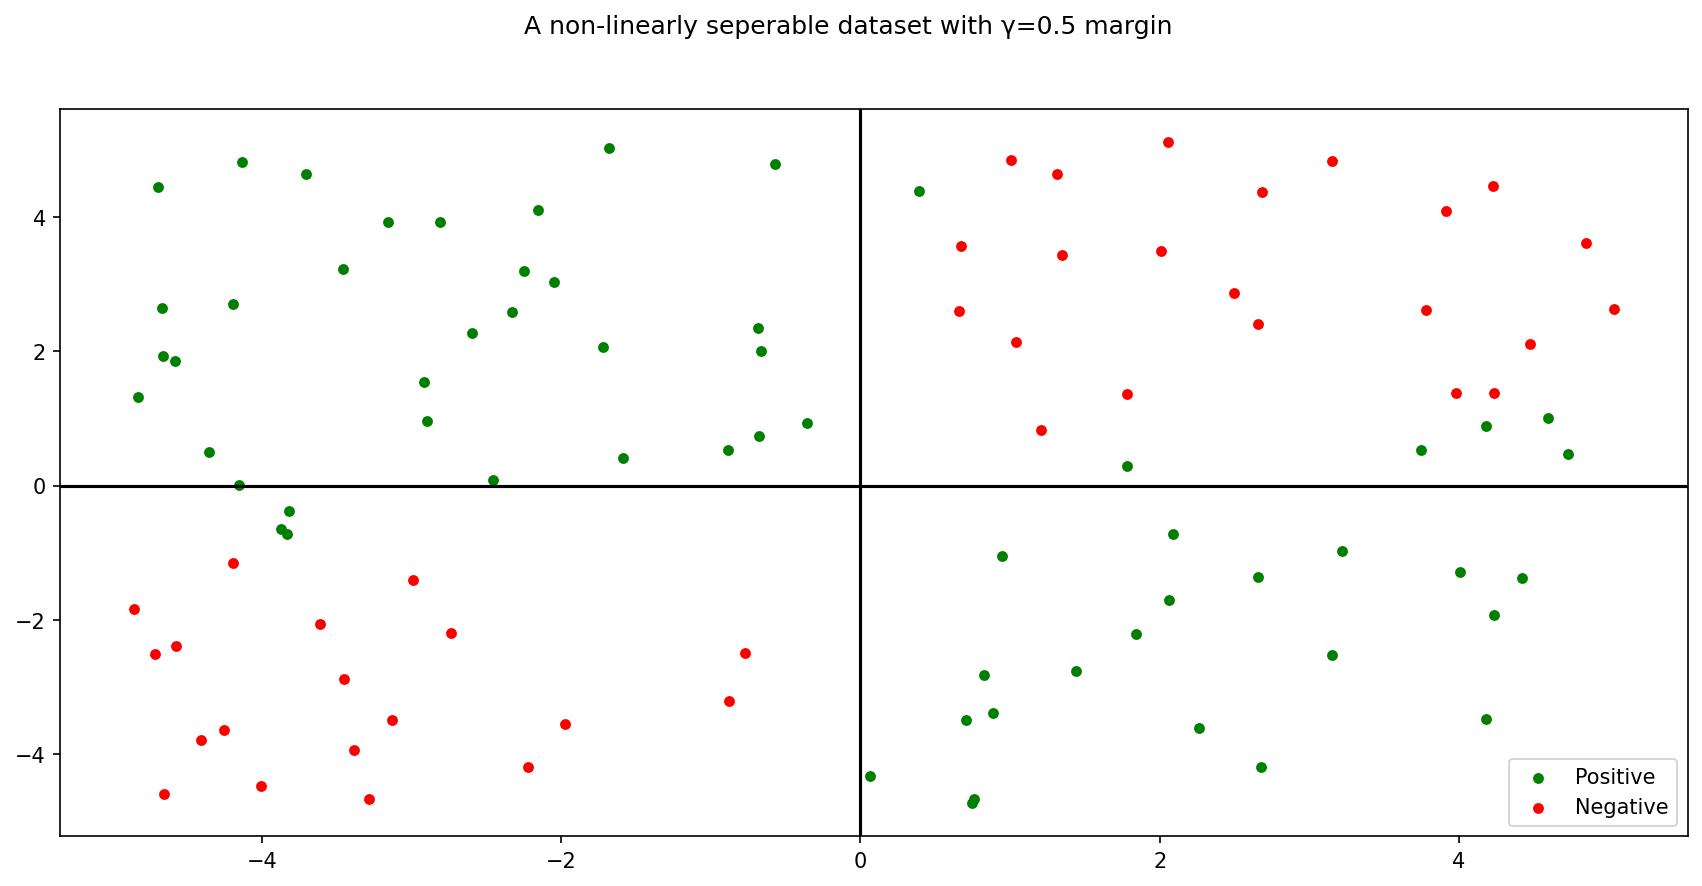

In [ ]:
np.random.seed(1)

X_ = np.random.rand(100, 2)
X_ = (X_-np.mean(X_))*10

X, y = [], []

perp = lambda i: -1*i[0]/i[1]
sign = lambda i: 2*int(i >= 0)-1

sep = lambda x: x[1]**2-8*x[1]*x[0]+2*x[0]**2

w = np.array([1, 1])/np.sqrt(2)
gamma = 0.5

for p in X_:
  d = sep(p)
  if abs(d) >= gamma:
    X.append(p)
    y.append(sign(d))

X = np.array(X)
y = np.array(y)

fig, (ax2) = plt.subplots(1, 1)
fig.suptitle(f'A non-linearly seperable dataset with γ={gamma} margin')

ax2.scatter(X[:, 0][y==1], X[:, 1][y==1], color='green', label='Positive')
ax2.scatter(X[:, 0][y!=1], X[:, 1][y!=1], color='red', label='Negative')
ax2.legend(loc='lower right')

ax2.axvline(x=0, c='black')
ax2.axhline(y=0, c='black')

plt.show()

The above dataset has a seperator corresponding to a second order function of the features.

Transform the dataset and apply perceptron! Alter inductive bias to our advantage

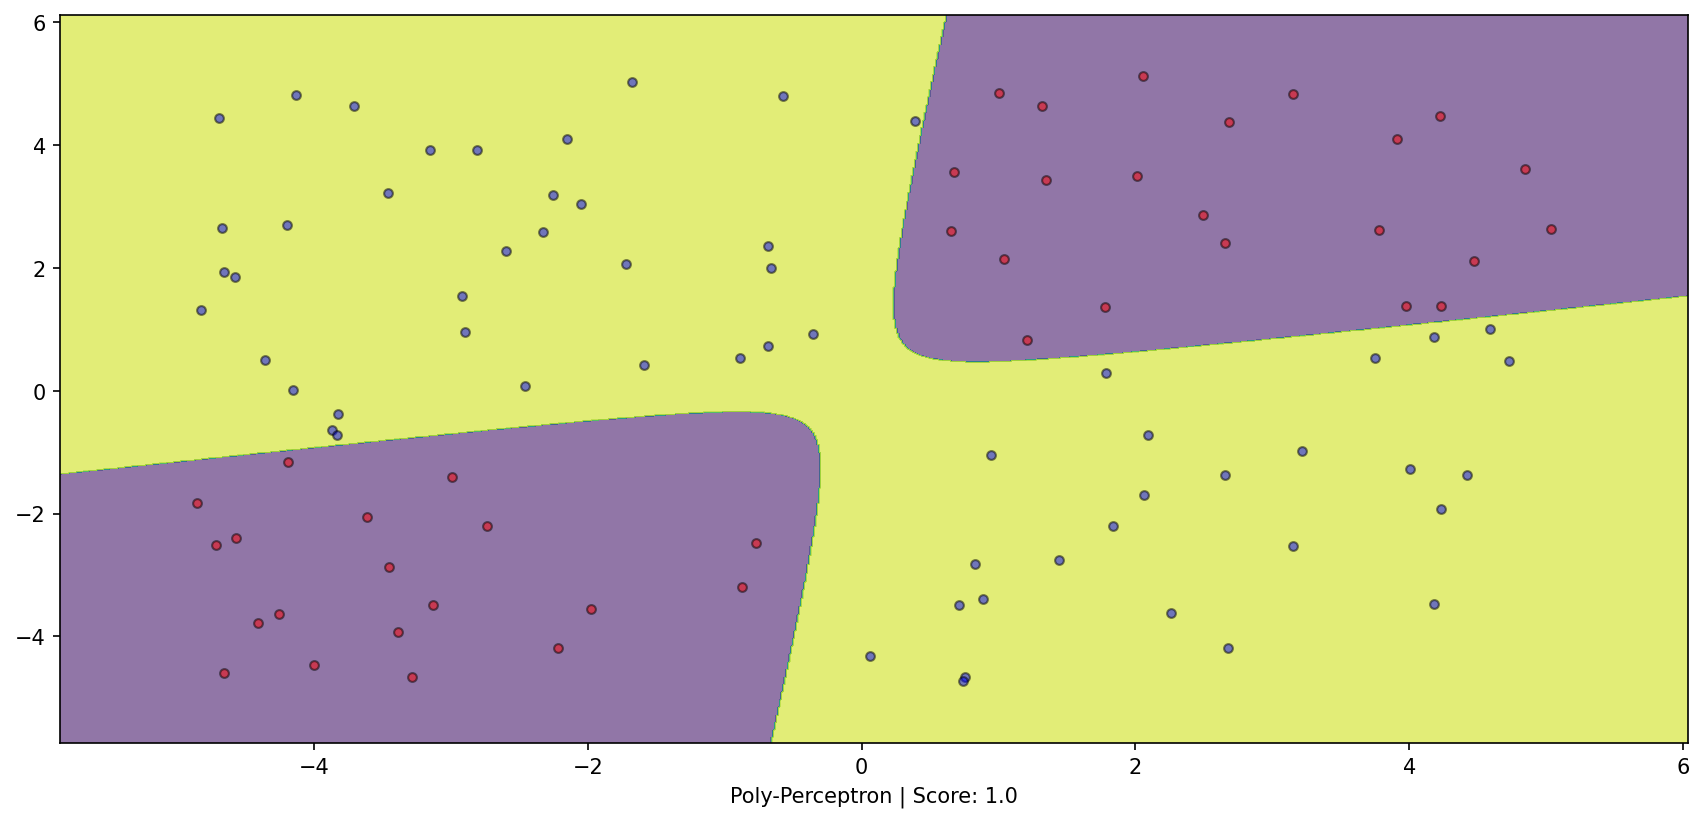

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Perceptron

poly_perceptron = make_pipeline(PolynomialFeatures(2), Perceptron(alpha=0, max_iter=int(1e6), tol=None))
poly_perceptron.fit(X, y)

fig, (ax1) = plt.subplots(1, 1)
disp = DecisionBoundaryDisplay.from_estimator(poly_perceptron, X, response_method="predict", grid_resolution=1000, alpha=0.6, ax=ax1)
disp.ax_.scatter(X[:, 0][y==-1], X[:, 1][y==-1], color='red', label='y==-1', edgecolor='k', alpha=0.5)
disp.ax_.scatter(X[:, 0][y==1], X[:, 1][y==1], color='blue', label='y==1', edgecolor='k', alpha=0.5)
disp.ax_.set_xlabel(f'Poly-Perceptron | Score: {poly_perceptron.score(X, y)}');